# Support Vector Machines (SVM)

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset

In [2]:
dataset = pd.read_csv('/content/Dataset_master.xlsx - Instagram Ads SVM.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [3]:
print(X)

[[   15  6334]
 [   28  6667]
 [   20 14334]
 [   21 19000]
 [   15 25334]
 [   21 19334]
 [   21 28000]
 [   25 50000]
 [   20 11000]
 [   28 21667]
 [   20 26667]
 [   26 17000]
 [   28 36000]
 [   18  6667]
 [   20 26334]
 [   21 18000]
 [   24 45000]
 [   24 29667]
 [   19 10667]
 [   14 14667]
 [   23 27667]
 [   28  7667]
 [   21 19334]
 [   19 18334]
 [   18 16000]
 [   22 26334]
 [   17  6000]
 [   25 39000]
 [   21  6667]
 [   20 29000]
 [   18 22000]
 [   25 40000]
 [   17 21000]
 [   24 22667]
 [   20 26667]
 [   19  9000]
 [   16  7667]
 [   26 37667]
 [   25  6000]
 [   27 37334]
 [   24 38667]
 [   20  5000]
 [   23  9334]
 [   23 27667]
 [   26 49667]
 [   15  7000]
 [   16 24000]
 [   20 11667]
 [   21 29667]
 [   20 28667]
 [   30 26667]
 [   31 23667]
 [   29 23667]
 [   20 30000]
 [   29 11000]
 [   17 18334]
 [   28 23667]
 [   23 49334]
 [   23 15667]
 [   16 29334]
 [   27 38334]
 [   20 39334]
 [   27 14334]
 [   27 24000]
 [   18  9334]
 [   28 15667]
 [   20  7

In [4]:
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1
 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1
 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 0 1 0 0 1 1 1 0]


## Splitting the dataset into Training & Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 ,random_state =42)

In [7]:
print(X_train)

[[   32 17334]
 [   25  6000]
 [   18 16000]
 [   34 44334]
 [   32 20334]
 [   20 29000]
 [   14 14667]
 [   38 24667]
 [   29 17334]
 [   30 19667]
 [   28 23667]
 [   21 19334]
 [   28 16667]
 [   36 26334]
 [   28 19334]
 [   32 25000]
 [   48 36000]
 [   32 20000]
 [   42 11334]
 [   36 39000]
 [   37 48000]
 [   25 40000]
 [   28 36000]
 [   19  9000]
 [   36 27334]
 [   23  9334]
 [   23 14334]
 [   28 24000]
 [   28 48000]
 [   31 23667]
 [   28 20000]
 [   29 26000]
 [   20  5000]
 [   29 26667]
 [   33 26667]
 [   17  6000]
 [   32 19000]
 [   32 26000]
 [   29 25667]
 [   20 14334]
 [   24 26334]
 [   16 24000]
 [   39 28667]
 [   38 43667]
 [   33 36000]
 [   16  7667]
 [   20 39334]
 [   21 19334]
 [   31 44667]
 [   36 32000]
 [   24 22667]
 [   26 17000]
 [   28 18000]
 [   29 20667]
 [   21 28000]
 [   25 39000]
 [   32 24000]
 [   15 25334]
 [   17 21000]
 [   32 26667]
 [   48 14000]
 [   28 26334]
 [   47 25334]
 [   20 26667]
 [   27 14334]
 [   33 49667]
 [   31 35

In [8]:
print(X_test)

[[   39 24667]
 [   21 18000]
 [   31 14000]
 [   43 34667]
 [   27 14334]
 [   39 29667]
 [   16 27334]
 [   19  7667]
 [   44 34667]
 [   30 16667]
 [   31 25000]
 [   30 23667]
 [   28 15667]
 [   18 22000]
 [   37 15667]
 [   46 33667]
 [   17 18334]
 [   27 38334]
 [   36  7334]
 [   38 46000]
 [   24 45000]
 [   32 17334]
 [   39 21667]
 [   37 37667]
 [   20  7334]
 [   38 39667]
 [   45 24667]
 [   28 21667]
 [   19 10667]
 [   38 44667]
 [   33 21667]
 [   15  7000]
 [   45 20000]
 [   44 13000]
 [   28 30334]
 [   26 13667]
 [   35 13000]
 [   45 40667]
 [   22 29667]
 [   16 12000]]


In [9]:
print(y_train)

[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1
 0 0 0 0 0 0 1 0 1 1 1]


In [10]:
print(y_test)

[0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0
 1 0 0]


## Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [13]:
print(X_train)

[[ 0.30645937 -0.72727353]
 [-0.55054887 -1.66795146]
 [-1.40755711 -0.83799034]
 [ 0.55131887  1.5136215 ]
 [ 0.30645937 -0.47828519]
 [-1.16269761  0.24095912]
 [-1.8972761  -0.94862416]
 [ 1.04103786 -0.11866304]
 [-0.06082987 -0.72727353]
 [ 0.06159987 -0.5336436 ]
 [-0.18325962 -0.20165915]
 [-1.04026786 -0.56128131]
 [-0.18325962 -0.78263194]
 [ 0.79617836  0.01969148]
 [-0.18325962 -0.56128131]
 [ 0.30645937 -0.09102533]
 [ 2.26533534  0.8219319 ]
 [ 0.30645937 -0.50600589]
 [ 1.53075685 -1.2252502 ]
 [ 0.79617836  1.07092024]
 [ 0.91860811  1.81788525]
 [-0.55054887  1.15391635]
 [-0.18325962  0.8219319 ]
 [-1.28512736 -1.41896313]
 [ 0.79617836  0.10268759]
 [-0.79540836 -1.39124243]
 [-0.79540836 -0.97626187]
 [-0.18325962 -0.17402145]
 [-0.18325962  1.81788525]
 [ 0.18402962 -0.20165915]
 [-0.18325962 -0.50600589]
 [-0.06082987 -0.00802922]
 [-1.16269761 -1.75094758]
 [-0.06082987  0.04732919]
 [ 0.42888912  0.04732919]
 [-1.52998685 -1.66795146]
 [ 0.30645937 -0.58900201]
 

In [14]:
print(X_test)

[[ 0.83361004  0.10721019]
 [-1.07785247 -0.48841934]
 [-0.01592885 -0.84577918]
 [ 1.25837949  1.0006098 ]
 [-0.4406983  -0.81593963]
 [ 0.83361004  0.55390999]
 [-1.60881428  0.34547986]
 [-1.29023719 -1.41156916]
 [ 1.36457185  1.0006098 ]
 [-0.12212122 -0.6075095 ]
 [-0.01592885  0.13696039]
 [-0.12212122  0.01787023]
 [-0.33450594 -0.69684947]
 [-1.39642956 -0.13105949]
 [ 0.62122532 -0.69684947]
 [ 1.57695657  0.91126984]
 [-1.50262192 -0.45857979]
 [-0.4406983   1.32821944]
 [ 0.51503295 -1.44131936]
 [ 0.72741768  2.01309958]
 [-0.75927539  1.92375962]
 [ 0.09026351 -0.54791975]
 [ 0.83361004 -0.1608097 ]
 [ 0.62122532  1.26862969]
 [-1.18404483 -1.44131936]
 [ 0.72741768  1.44730961]
 [ 1.47076421  0.10721019]
 [-0.33450594 -0.1608097 ]
 [-1.29023719 -1.14354927]
 [ 0.72741768  1.89400941]
 [ 0.19645587 -0.1608097 ]
 [-1.71500664 -1.47115891]
 [ 1.47076421 -0.30973941]
 [ 1.36457185 -0.93511914]
 [-0.33450594  0.61349975]
 [-0.54689066 -0.87552939]
 [ 0.40884059 -0.93511914]
 

## SVM Training on Training set

In [17]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state = 42)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

## Predicting

In [18]:
print(classifier.predict(sc.transform([[32,45000]])))

[1]


## Predicting Test set results

In [19]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]]


## Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_pred,y_test)
print(cm)
accuracy_score(y_pred,y_test)

[[23  3]
 [ 2 12]]


0.875

## Visualizing Test Set results

<ipython-input-22-24fde3fa4f41>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


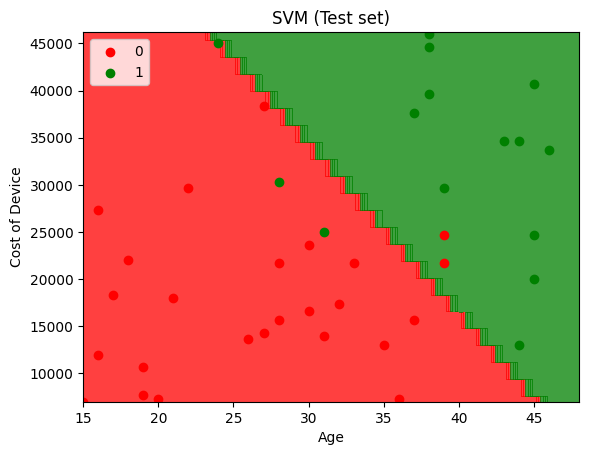

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 3, step = 1),
                     np.arange(start = X_set[:, 1].min() - 0, stop = X_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Cost of Device')
plt.legend()
plt.show()

## Visualising Training set results

<ipython-input-23-74bc78ede1bf>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


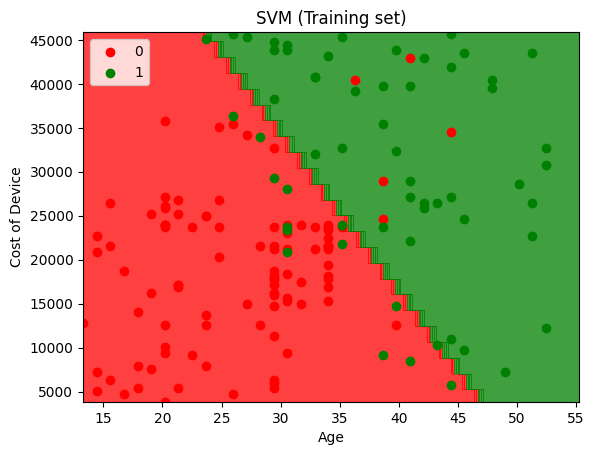

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 3, step = 1),
                     np.arange(start = X_set[:, 1].min() - 0, stop = X_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Cost of Device')
plt.legend()
plt.show()